# Building A Handwritten Digits Classifier

In the neural networks framework, adding hidden layers of neurons to a neural network can improve its ability to capture nonlinearity in the data.

In this Project, I'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

__Why is image classifcation a hard task?__

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million).

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

__Why is deep learning effective in image classification?__

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process.

## Working with Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.
I'll work with this dataset.

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
digits = load_digits(return_X_y=True)
print(type(digits))

<class 'tuple'>


The parameter as_frame seems is not yet present in the used version of sklearn.

In [3]:
data = pd.DataFrame(digits[0])
labels = pd.DataFrame(digits[1])

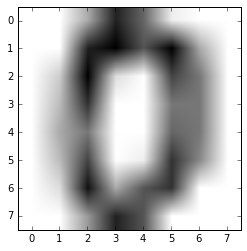

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

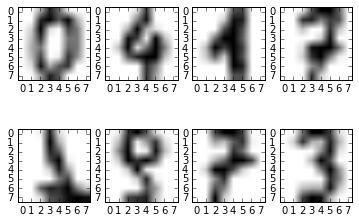

In [5]:
fig, axes = plt.subplots(2, 4)

axes[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axes[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
axes[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
axes[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')
axes[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
axes[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
axes[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
axes[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

Let's try firstly the k-nearest neighbors algorithm.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import KFold

def train(k, train_features, target):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, target)
    return knn

def test(knn, test_features, test_labels):
    predictions = pd.Series(knn.predict(test_features)).reset_index(drop=True)
    test_labels_ser = test_labels.reset_index(drop=True)
    accuracy = sum(predictions==test_labels_ser)/len(test_labels_ser)    
    return accuracy

def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits = 4)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        test_labels = test_labels.iloc[:,0]
        train_labels = train_labels.iloc[:,0]
        model = train(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        accuracies.append(accuracy)
    mean_accuracy = np.mean(accuracies)
    return mean_accuracy

print(cross_validate(2))

0.9616010888393962


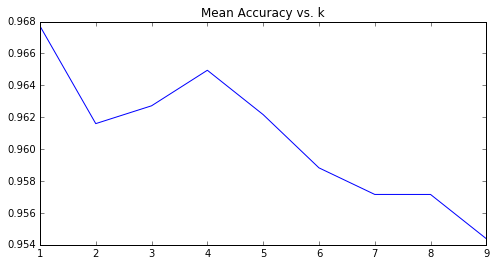

In [8]:
k_values = list(range(1,10))
k_accuracies = []

for k in k_values:
    k_accuracy = cross_validate(k)
    k_accuracies.append(k_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_accuracies)

## Neural Network with One Hidden Layer

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer.

In [9]:
from sklearn.neural_network import MLPClassifier

def nn_train(n, train_features, target):
    mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=(n,), activation='logistic')
    mlp.fit(train_features, target)
    return mlp

def nn_test(mlp, test_features, test_labels):
    predictions = pd.Series(mlp.predict(test_features)).reset_index(drop=True)
    test_labels_ser = test_labels.reset_index(drop=True)
    accuracy = sum(predictions==test_labels_ser)/len(test_labels_ser)    
    return accuracy

def nn_cross_validate(n):
    accuracies = []
    kf = KFold(n_splits = 4)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        test_labels = test_labels.iloc[:,0]
        train_labels = train_labels.iloc[:,0]
        model = nn_train(n, train_features, train_labels)
        accuracy = nn_test(model, test_features, test_labels)
        accuracies.append(accuracy)
    mean_accuracy = np.mean(accuracies)
    return mean_accuracy

print(nn_cross_validate(2))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.31496659242761693


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



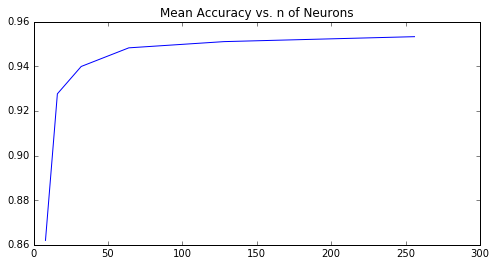

In [13]:
n_neurons=[8,16,32,64,128,256]

nn_accuracies=[]

for n in n_neurons:
    overall_accuracy = nn_cross_validate(n)
    nn_accuracies.append(overall_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. n of Neurons")
plt.plot(n_neurons, nn_accuracies)

## Neural Network with Two Hidden Layers

Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [14]:
def nn_train(tuple_n, train_features, target):
    mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=tuple_n, activation='logistic')
    mlp.fit(train_features, target)
    return mlp

def nn_test(mlp, test_features, test_labels):
    predictions = pd.Series(mlp.predict(test_features)).reset_index(drop=True)
    test_labels_ser = test_labels.reset_index(drop=True)
    accuracy = sum(predictions==test_labels_ser)/len(test_labels_ser)    
    return accuracy

def nn_cross_validate(tuple_n):
    accuracies = []
    accuracies_train = []
    kf = KFold(n_splits = 4)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        test_labels = test_labels.iloc[:,0]
        train_labels = train_labels.iloc[:,0]
        model = nn_train(tuple_n, train_features, train_labels)
        accuracy = nn_test(model, test_features, test_labels)
        accuracies.append(accuracy)
        accuracy_train=nn_test(model, train_features, train_labels)
        accuracies_train.append(accuracy_train)
    mean_accuracy = np.mean(accuracies)
    mean_accuracy_train = np.mean(accuracies_train)
    if (mean_accuracy_train-mean_accuracy>0.05)&(mean_accuracy>0.90):
        print("Warning: suspect Overfitting!")
    return mean_accuracy

print(nn_cross_validate((2, 2)))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.23373793615441724


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



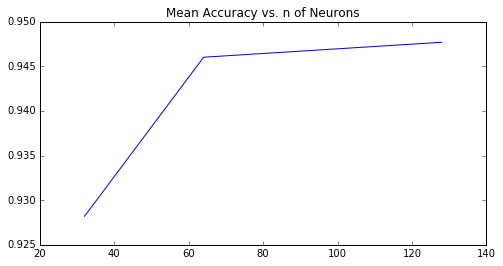

In [15]:
tuple_n_neurons=[
    (32, 32),
    (64, 64),
    (128, 128)
]

nn_accuracies_m_layers=[]
n_neur_for_layer=[]

for n in tuple_n_neurons:
    overall_accuracy = nn_cross_validate(n)
    nn_accuracies_m_layers.append(overall_accuracy)
    n_neur_for_layer.append(n[0])

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. n of Neurons")
plt.plot(n_neur_for_layer, nn_accuracies_m_layers)

In [16]:
def nn_train(tuple_n, train_features, target):
    mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=tuple_n, activation='relu')
    mlp.fit(train_features, target)
    return mlp

def nn_test(mlp, test_features, test_labels):
    predictions = pd.Series(mlp.predict(test_features)).reset_index(drop=True)
    test_labels_ser = test_labels.reset_index(drop=True)
    accuracy = sum(predictions==test_labels_ser)/len(test_labels_ser)    
    return accuracy

def nn_cross_validate(tuple_n):
    accuracies = []
    accuracies_train = []
    kf = KFold(n_splits = 4)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        test_labels = test_labels.iloc[:,0]
        train_labels = train_labels.iloc[:,0]
        model = nn_train(tuple_n, train_features, train_labels)
        accuracy = nn_test(model, test_features, test_labels)
        accuracies.append(accuracy)
        #accuracy_train=nn_test(model, train_features, train_labels)
        #accuracies_train.append(accuracy_train)
    mean_accuracy = np.mean(accuracies)
    #mean_accuracy_train = np.mean(accuracies_train)
    #if (mean_accuracy_train-mean_accuracy>0.05)&(mean_accuracy>0.90):
        #print("Warning: suspect Overfitting!")
    return mean_accuracy

print(nn_cross_validate((2, 2)))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.1846844840386043


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



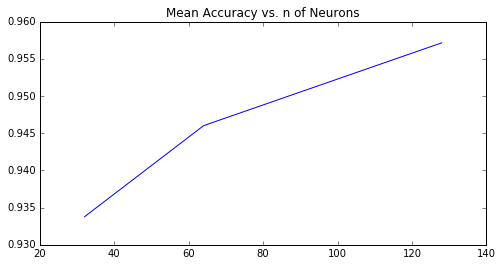

In [17]:
nn_accuracies_m_layers=[]
n_neur_for_layer=[]

for n in tuple_n_neurons:
    overall_accuracy = nn_cross_validate(n)
    nn_accuracies_m_layers.append(overall_accuracy)
    n_neur_for_layer.append(n[0])

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. n of Neurons")
plt.plot(n_neur_for_layer, nn_accuracies_m_layers)

The 2 layer neural network reach a good accuracy, with "relu" as activation function more than with "sigmoid" function as higher number of neurons. Anyway we are still under the accuracy of k-neighbors algorithm. Furthermore, we are at risk overfitting.

## Neural Network with Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [18]:
def nn_cross_validate(tuple_n):
    accuracies = []
    accuracies_train = []
    kf = KFold(n_splits = 6)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        test_labels = test_labels.iloc[:,0]
        train_labels = train_labels.iloc[:,0]
        model = nn_train(tuple_n, train_features, train_labels)
        accuracy = nn_test(model, test_features, test_labels)
        accuracies.append(accuracy)
    mean_accuracy = np.mean(accuracies)
    return mean_accuracy

print(nn_cross_validate((2, 2, 2)))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.22819212188777407


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



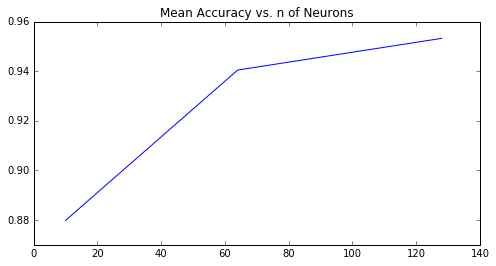

In [19]:
tuple_n_neurons=[
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_accuracies_m_layers=[]
n_neur_for_layer=[]

for n in tuple_n_neurons:
    overall_accuracy = nn_cross_validate(n)
    nn_accuracies_m_layers.append(overall_accuracy)
    n_neur_for_layer.append(n[0])

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. n of Neurons")
plt.plot(n_neur_for_layer, nn_accuracies_m_layers)

Adding another neuron layer doesn't seems to improve very much the accuracy.

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



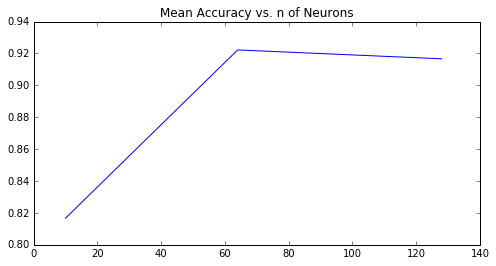

In [23]:
from sklearn.model_selection import cross_val_score

split_length = int(len(data)*0.8)
train_features = data.iloc[:split_length]
test_features = data.iloc[split_length:]
#labels = labels.iloc[:,0]
train_labels = labels.iloc[:split_length]
test_labels = labels.iloc[split_length:]

tuple_n_neurons=[
    (10, 10, 10, 10),
    (64, 64, 64, 64),
    (128, 128, 128, 128)
]

nn_accuracies_m_layers=[]
n_neur_for_layer=[]

for n in tuple_n_neurons:
    model = nn_train(n, train_features, train_labels)
    overall_accuracy = nn_test(model, test_features, test_labels)
    nn_accuracies_m_layers.append(overall_accuracy)
    n_neur_for_layer.append(n[0])

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. n of Neurons")
plt.plot(n_neur_for_layer, nn_accuracies_m_layers)

## Random Forest Models

Let's try Random Forest Models to be compared with Neural Networks.

In [25]:
from sklearn.ensemble import RandomForestClassifier

def forest_train(train_features, target):
    clf = RandomForestClassifier(n_estimators=150, random_state=1, min_samples_leaf=2)
    clf.fit(train_features, target)
    return clf

def forest_test(clf, test_features, test_labels):
    predictions = pd.Series(clf.predict(test_features)).reset_index(drop=True)
    test_labels_ser = test_labels.reset_index(drop=True)
    accuracy = sum(predictions==test_labels_ser)/len(test_labels_ser)    
    return accuracy

def forest_cross_validate(k):
    accuracies = []
    #accuracies_train = []
    kf = KFold(n_splits = k)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = forest_train(train_features, train_labels)
        accuracy = forest_test(model, test_features, test_labels)
        accuracies.append(accuracy)
        #accuracy_train=nn_test(model, train_features, train_labels)
        #accuracies_train.append(accuracy_train)
    mean_accuracy = np.mean(accuracies)
    #mean_accuracy_train = np.mean(accuracies_train)
    #if (mean_accuracy_train-mean_accuracy>0.05)&(mean_accuracy>0.90):
        #print("Warning: suspect Overfitting!")
    return mean_accuracy

print(forest_cross_validate(6))

0.9488015607580825


The Random Forest Model return an accuracy of about 0.95, close but lower respect to the multilayered neural network.